## 14 APRIL

In [49]:
import pandas as pd

In [50]:
df=pd.read_csv("HEART.csv")

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [52]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Q2. Split the dataset into a training set (70%) and a test set (30%).

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X=df.drop("target",axis=1)
y=df["target"]

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rand_clas=RandomForestClassifier(n_estimators=100,max_depth=10)

In [59]:
rand_clas.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [60]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [61]:
y_pred=rand_clas.predict(X_test)

In [62]:
print("accuracy_score",accuracy_score(y_pred,y_test))
print("f1_score",f1_score(y_pred,y_test))
print("recall_score",recall_score(y_pred,y_test))
print("precision_score",precision_score(y_pred,y_test))

accuracy_score 0.8021978021978022
f1_score 0.82
recall_score 0.82
precision_score 0.82


Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [63]:
import seaborn as sns 

In [64]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot: >

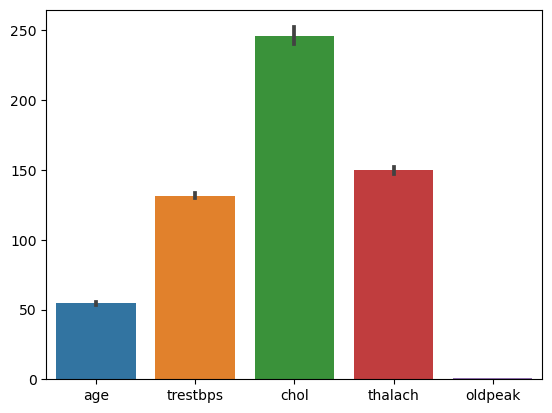

In [65]:
sns.barplot(df[["age","trestbps","chol","thalach","oldpeak"]])

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameter={
"n_estimators":[100,200,300],
"max_depth":[1,2,3,None],
"min_samples_split":[1,2,3,4],
"min_samples_leaf":[1,2,3,4]


}

In [68]:
r=RandomForestClassifier()

In [69]:
c=GridSearchCV(r,param_grid=parameter,cv=5,scoring="accuracy",verbose=3)

In [70]:
c.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=0.791 total time=   0.2s
[CV 2/5] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=0.762 total time=   0.2s
[CV 4/5] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=0.810 total time=   0.2s
[CV 1/5] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=0.884 total time=   0.6s
[CV 2/5] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=0.837 total time=   0.4s
[CV 3/5] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=0.714 total time=   0.4s
[

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [79]:
c.best_params_

{'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [80]:
random_classifier=RandomForestClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=1,n_estimators=100)

In [81]:
random_classifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=1)

In [82]:
y=random_classifier.predict(X_test)

In [83]:
#Compare the performance of the tuned model with the default model.

In [84]:
print("THE PERFORMANCE OF THE TUNED MODEL",accuracy_score(y,y_test))
print("THE PERFORMANCE OF THE DEFAULT MODEL",accuracy_score(y_pred,y_test))

THE PERFORMANCE OF THE TUNED MODEL 0.8351648351648352
THE PERFORMANCE OF THE DEFAULT MODEL 0.8021978021978022


Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [85]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='age', ylabel='chol'>

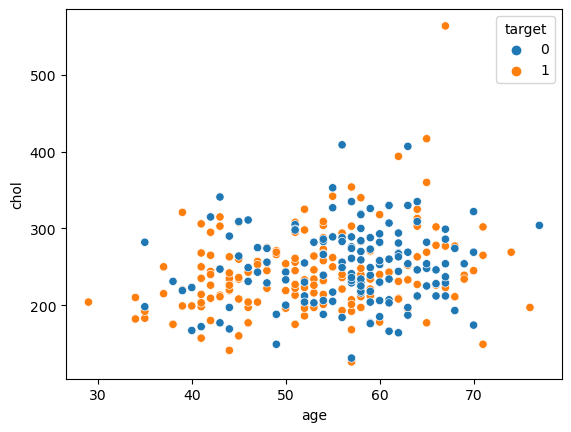

In [86]:
sns.scatterplot(x=df["age"],y=df["chol"],hue=df["target"])